In [1]:
import numpy as np
import pandas as pd 
from sklearn.metrics import accuracy_score
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"
import matplotlib.pyplot as plt
import os
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
folder_path = 'C:\\Users\\akshi_sh9bvdj\\Downloads\\archive\\stock_market_data\\forbes2000\\csv'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

In [4]:
dataframes = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]

In [5]:
# Combine All the datasets into 1
dataframes = []  # Create an empty list to store DataFrames

for file in csv_files:  # Iterate over each CSV file in the 'csv_files' list
  # Read the CSV
  df = pd.read_csv(os.path.join(folder_path, file))  # Read the file into a DataFrame

  # Add a new column representing the filename without the ".csv" extension
  filename_without_extension = os.path.splitext(file)[0]  # Extract filename without extension
  df.insert(0, 'Name', filename_without_extension)   # Insert a 'Name' column at the beginning
  df['Name'] = filename_without_extension  # Alternative way to populate 'Name' column 
  dataframes.append(df)  # Add the modified DataFrame to the list

# Concatenate all DataFrames
stocks_df = pd.concat(dataframes, ignore_index=True)  # Combine DataFrames into one 

# Save new merged Dataset
stocks_df.to_csv('merged_dataset_with_id.csv', index=False)  # Save as a new CSV, exclude old indices 

In [6]:
stocks_df.tail(5)

,Name,Date,Low,Open,Volume,High,Close,Adjusted Close
5601966,ZURVY,06-12-2022,47.810001,48.029999,42700.0,48.209999,47.980000,47.980000
5601967,ZURVY,07-12-2022,47.740002,47.959999,74800.0,48.130001,47.810001,47.810001
5601968,ZURVY,08-12-2022,47.880001,47.950001,72300.0,48.290001,48.160000,48.160000
5601969,ZURVY,09-12-2022,48.259998,48.470001,65600.0,48.740002,48.310001,48.310001
5601970,ZURVY,12-12-2022,48.044998,48.189999,13244.0,48.189999,48.044998,48.044998


In [7]:
print(stocks_df)

          Name        Date        Low       Open      Volume       High  \
0            A  18-11-1999  28.612303  32.546494  62546380.0  35.765381   
1            A  19-11-1999  28.478184  30.713518  15234146.0  30.758226   
2            A  22-11-1999  28.657009  29.551144   6577870.0  31.473534   
3            A  23-11-1999  28.612303  30.400572   5975611.0  31.205294   
4            A  24-11-1999  28.612303  28.701717   4843231.0  29.998213   
...        ...         ...        ...        ...         ...        ...   
5601966  ZURVY  06-12-2022  47.810001  48.029999     42700.0  48.209999   
5601967  ZURVY  07-12-2022  47.740002  47.959999     74800.0  48.130001   
5601968  ZURVY  08-12-2022  47.880001  47.950001     72300.0  48.290001   
5601969  ZURVY  09-12-2022  48.259998  48.470001     65600.0  48.740002   
5601970  ZURVY  12-12-2022  48.044998  48.189999     13244.0  48.189999   

             Close  Adjusted Close  
0        31.473534       27.066582  
1        28.880545       

In [9]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5601971 entries, 0 to 5601970
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Name            object 
 1   Date            object 
 2   Low             float64
 3   Open            float64
 4   Volume          float64
 5   High            float64
 6   Close           float64
 7   Adjusted Close  float64
dtypes: float64(6), object(2)
memory usage: 341.9+ MB


In [10]:
# Convert Date column to datetime
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'], format='%d-%m-%Y')
print(stocks_df)

          Name       Date        Low       Open      Volume       High  \
0            A 1999-11-18  28.612303  32.546494  62546380.0  35.765381   
1            A 1999-11-19  28.478184  30.713518  15234146.0  30.758226   
2            A 1999-11-22  28.657009  29.551144   6577870.0  31.473534   
3            A 1999-11-23  28.612303  30.400572   5975611.0  31.205294   
4            A 1999-11-24  28.612303  28.701717   4843231.0  29.998213   
...        ...        ...        ...        ...         ...        ...   
5601966  ZURVY 2022-12-06  47.810001  48.029999     42700.0  48.209999   
5601967  ZURVY 2022-12-07  47.740002  47.959999     74800.0  48.130001   
5601968  ZURVY 2022-12-08  47.880001  47.950001     72300.0  48.290001   
5601969  ZURVY 2022-12-09  48.259998  48.470001     65600.0  48.740002   
5601970  ZURVY 2022-12-12  48.044998  48.189999     13244.0  48.189999   

             Close  Adjusted Close  
0        31.473534       27.066582  
1        28.880545       24.836662  


In [11]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5601971 entries, 0 to 5601970
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Name            object        
 1   Date            datetime64[ns]
 2   Low             float64       
 3   Open            float64       
 4   Volume          float64       
 5   High            float64       
 6   Close           float64       
 7   Adjusted Close  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 341.9+ MB


In [12]:
stocks_df.describe()

,Date,Low,Open,Volume,High,Close,Adjusted Close
count,5601971,5.555576e+06,5.555576e+06,5.555576e+06,5.555576e+06,5.555576e+06,5.555576e+06
mean,2008-07-17 12:31:32.920901888,1.789278e+07,1.789299e+07,3.055431e+06,1.789346e+07,1.789299e+07,-1.213999e+28
min,1970-01-02 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.554577e+34
25%,2001-10-03 00:00:00,7.330000e+00,7.200000e+00,5.700000e+03,7.491303e+00,7.410000e+00,4.450642e+00
50%,2011-11-07 00:00:00,1.900000e+01,1.911000e+01,3.099000e+05,1.940000e+01,1.920000e+01,1.364000e+01
75%,2017-09-05 00:00:00,4.196000e+01,4.236000e+01,1.789100e+06,4.285000e+01,4.241000e+01,3.342836e+01
max,2022-12-12 00:00:00,8.324640e+12,8.324640e+12,7.421641e+09,8.324640e+12,8.324640e+12,3.904317e+31
std,NaN,8.180296e+09,8.180296e+09,2.360794e+07,8.180296e+09,8.180296e+09,1.102262e+31


In [13]:
# Filter data from 2010 to 2022
stocks_filtered_df= stocks_df[(stocks_df['Date'].dt.year>= 2010) & (stocks_df['Date'].dt.year <= 2022 )]

In [14]:
print(stocks_filtered_df)

          Name       Date        Low       Open     Volume       High  \
2545         A 2010-01-04  22.267525  22.453505  3815561.0  22.625179   
2546         A 2010-01-05  22.002861  22.324751  4186031.0  22.331903   
2547         A 2010-01-06  22.002861  22.067240  3243779.0  22.174536   
2548         A 2010-01-07  21.816881  22.017166  3095172.0  22.045780   
2549         A 2010-01-08  21.745352  21.917025  3733918.0  22.067240   
...        ...        ...        ...        ...        ...        ...   
5601966  ZURVY 2022-12-06  47.810001  48.029999    42700.0  48.209999   
5601967  ZURVY 2022-12-07  47.740002  47.959999    74800.0  48.130001   
5601968  ZURVY 2022-12-08  47.880001  47.950001    72300.0  48.290001   
5601969  ZURVY 2022-12-09  48.259998  48.470001    65600.0  48.740002   
5601970  ZURVY 2022-12-12  48.044998  48.189999    13244.0  48.189999   

             Close  Adjusted Close  
2545     22.389128       20.434929  
2546     22.145924       20.212959  
2547     22.

In [15]:
# Group by Name and calculate the most sold shares 
most_sold_stocks_df=stocks_filtered_df.groupby('Name')['Volume'].sum().nlargest(10)
top_shares_df = stocks_filtered_df[stocks_filtered_df['Name'].isin(most_sold_stocks_df.index)]
top_shares_df['Name'].unique()

array(['AAPL', 'AMD', 'AMZN', 'CSCO', 'F', 'GOOG', 'MSFT', 'PFE', 'T',
       'TSLA'], dtype=object)

# Plots :

## Line Charts of opening and closing prices of top 10 stocks by volume 

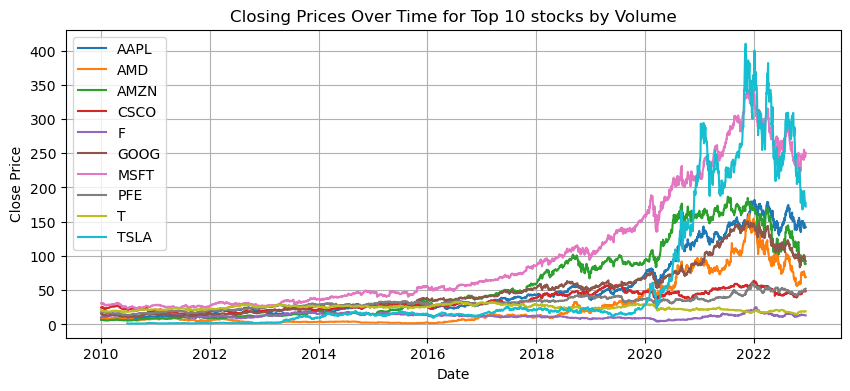

In [16]:
# Plot the close prices over time for the top 10 performing stocks
plt.figure(figsize=(10,4))
for name, group in top_shares_df.groupby('Name'):
    plt.plot(group['Date'], group['Close'], label=name)
plt.title('Closing Prices Over Time for Top 10 stocks by Volume')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

#### 1. Tesla and Microsoft show a general upward trajectory for their closing prices.
#### 2. Tesla's (blue) stock price has seen substantially more dramatic growth than Microsoft's (pink) over the analyzed period. This aligns with Tesla's reputation as a disruptive, high-growth company.
#### 3. While Microsoft (pink) has experienced growth, it displays a significantly steadier trajectory. This is typical of mature, established companies with diversified income streams. 

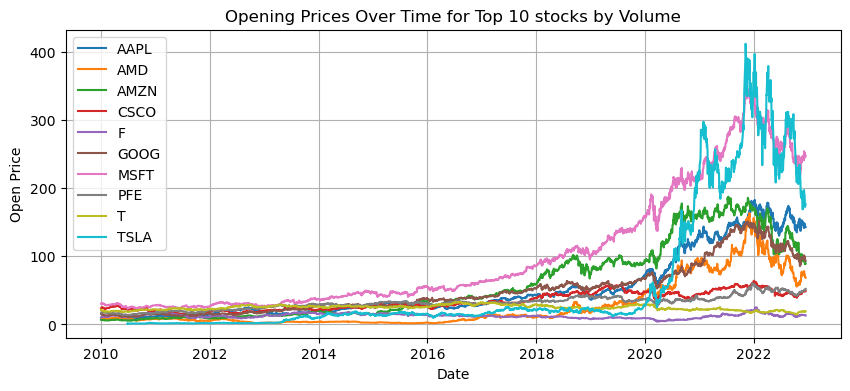

In [17]:
# Plot the opening prices over time for the top 10 performing stocks
plt.figure(figsize=(10,4))
for name, group in top_shares_df.groupby('Name'):
    plt.plot(group['Date'], group['Open'], label=name)
plt.title('Opening Prices Over Time for Top 10 stocks by Volume')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)
plt.show()

### Tesla & Microsoft's opening stock prices also show a similar trend as their closing prices.


## Scatter Plot of High Vs Low Prices of top 10 stocks by volume

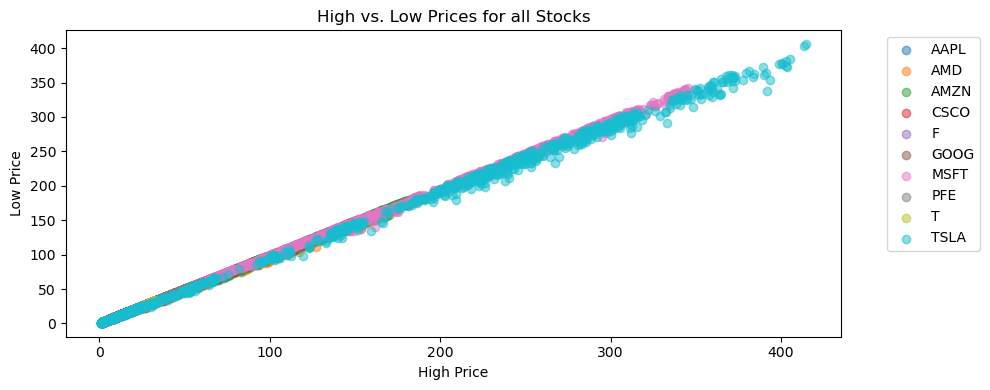

In [18]:
# Scatter Plot of High vs. Low Prices for the top 10 stocks
plt.figure(figsize=(10,4))
for name, group in top_shares_df.groupby('Name'):
    plt.scatter(group['High'], group['Low'], label=name, alpha=0.5)
plt.title('High vs. Low Prices for all Stocks')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Axes:
### X-axis: Represents the low prices of stocks within a given time period.
### Y-axis: Represents the high prices of stocks within the same time period.

### The Graph highlights the difference between a stock's high and low prices over a period, giving a sense of how far the price has fluctuated.

### Tesla's and Microsoft's stock prices are consistently higher than others.



## Distribution of Closing prices of the Top 10 stocks by Volume

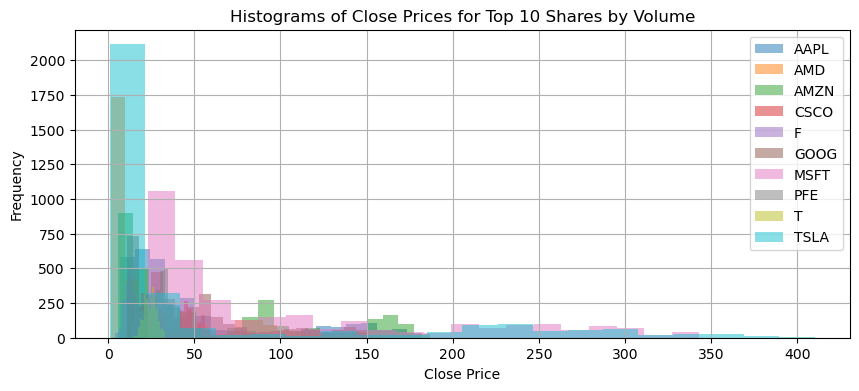

In [19]:
# Plot histograms of close prices for the top 10 stocks
plt.figure(figsize=(10, 4))
for name, group in top_shares_df.groupby('Name'):
    plt.hist(group['Close'], bins=20, alpha=0.5, label=name)

plt.title('Histograms of Close Prices for Top 10 Shares by Volume')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

### The graph above indicates that both Tesla and Microsoft had the most occurrences of their close prices within the range of 0 to 100.

In [20]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


## 20 days and 50 days moving average of top 10 stocks by volume : 

#### A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

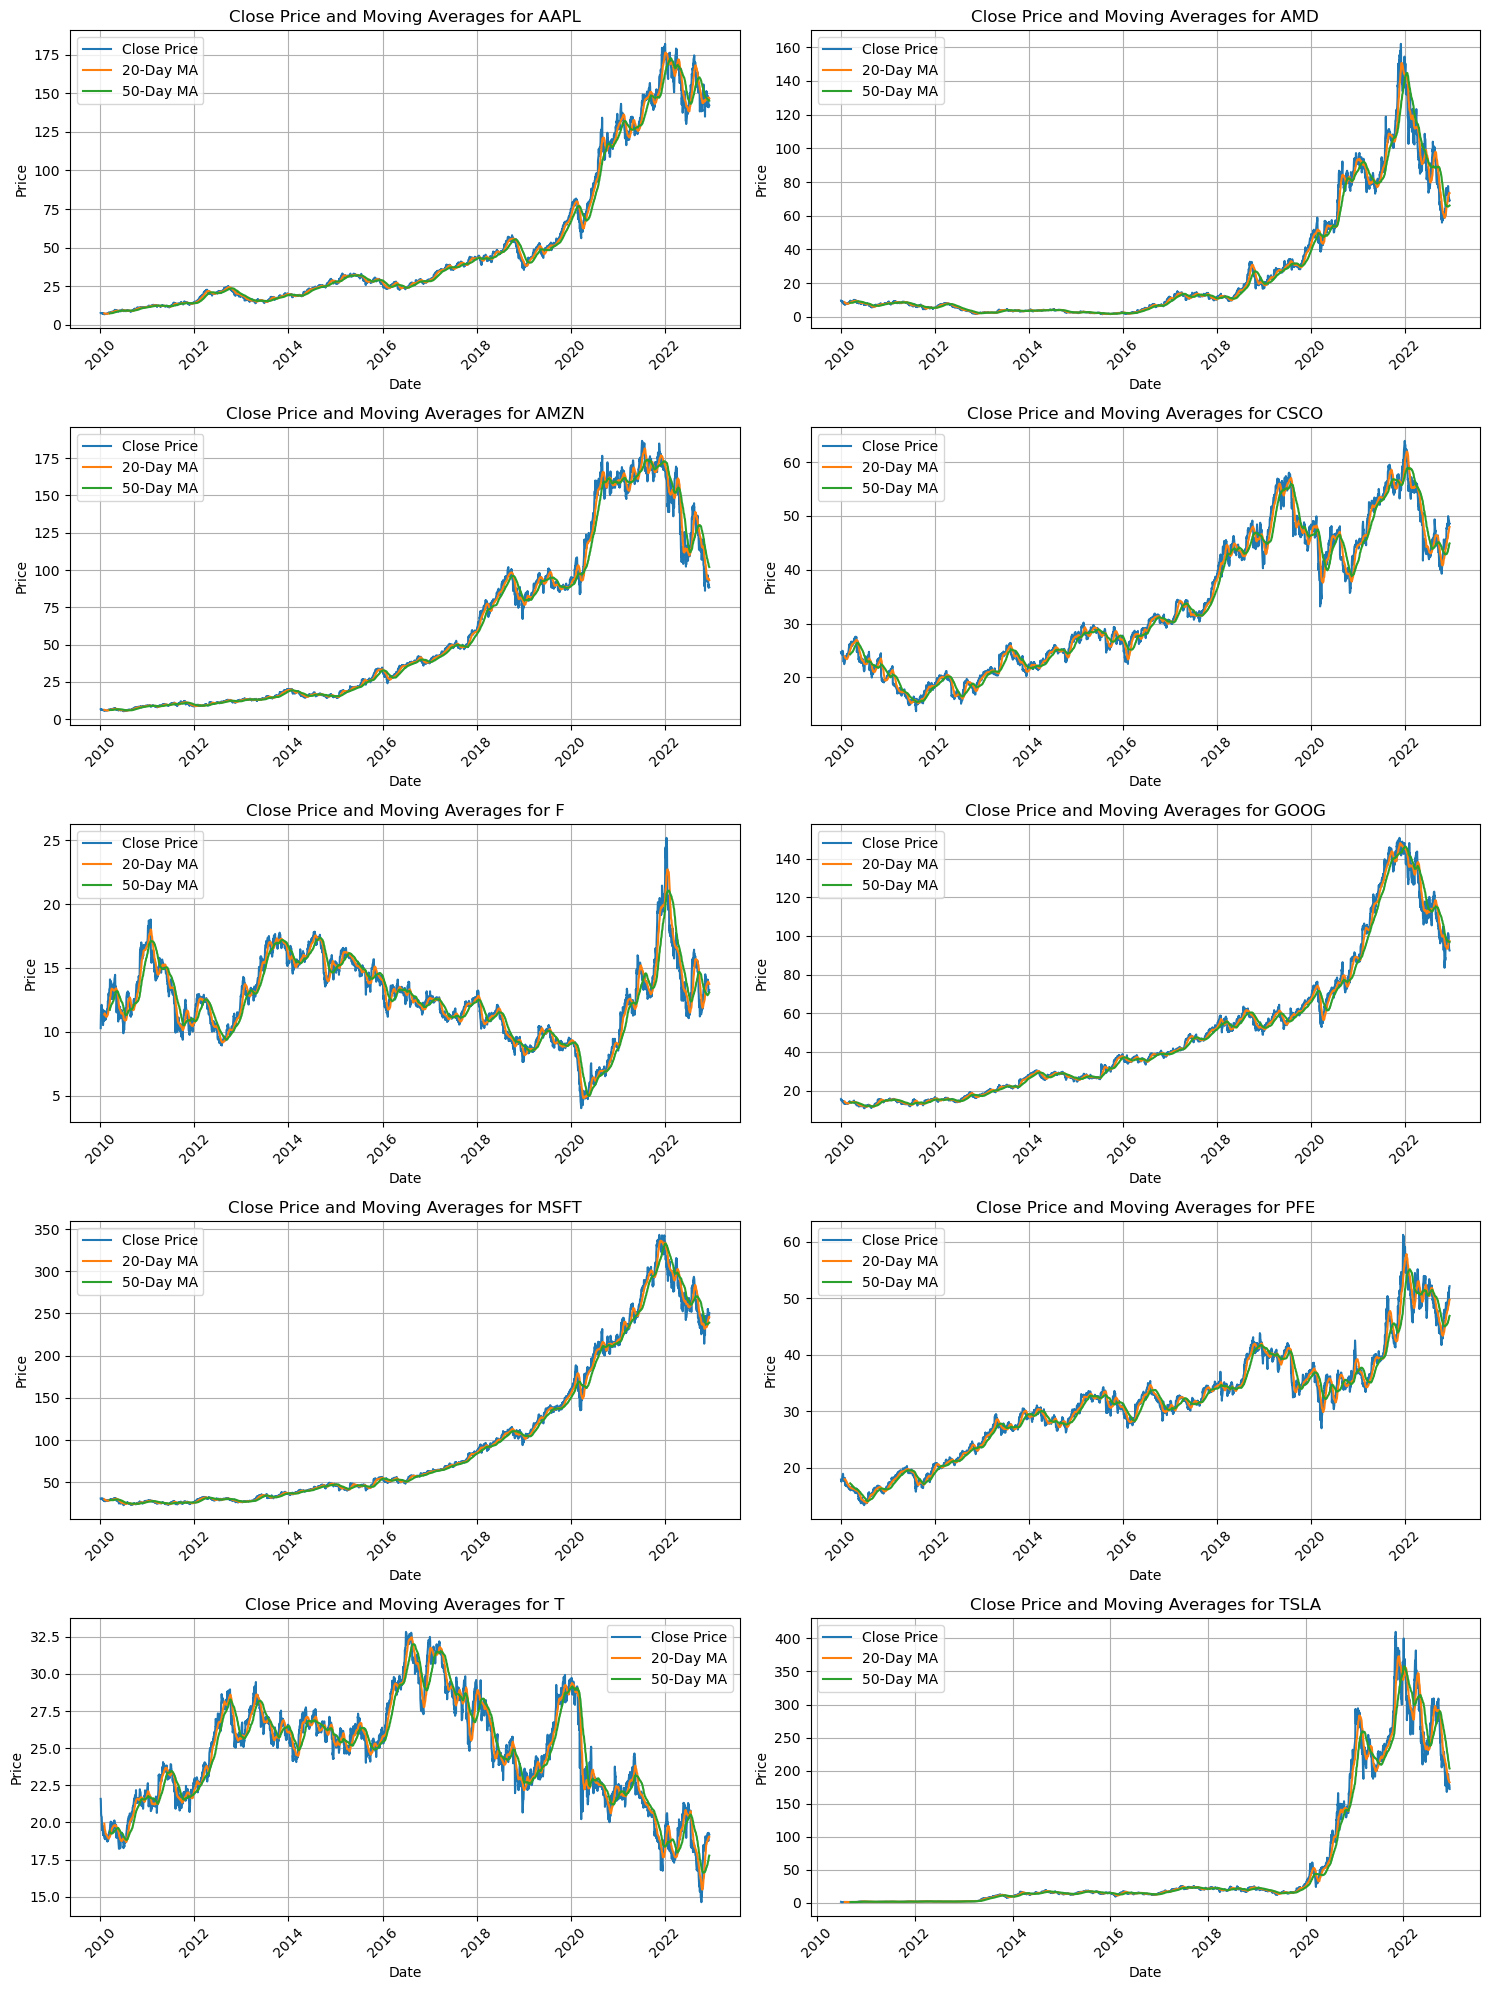

In [21]:
# Calculate 20-day and 50-day moving averages for each of the top 10 stocks
fig, axs = plt.subplots(5, 2, figsize=(15, 20))  # Creating subplots with 5 rows and 2 columns

# Flatten the axs array for easier iteration
axs = axs.flatten()

for i, (name, group) in enumerate(top_shares_df.groupby('Name')):
    # 20-day moving average
    group['20-Day MA'] = group['Close'].rolling(window=20).mean()
    
    # 50-day moving average
    group['50-Day MA'] = group['Close'].rolling(window=50).mean()
    
    # Plotting
    axs[i].plot(group['Date'], group['Close'], label='Close Price')
    axs[i].plot(group['Date'], group['20-Day MA'], label='20-Day MA')
    axs[i].plot(group['Date'], group['50-Day MA'], label='50-Day MA')
    axs[i].set_title(f'Close Price and Moving Averages for {name}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Correlation chart of closing prices of top 10 stocks 

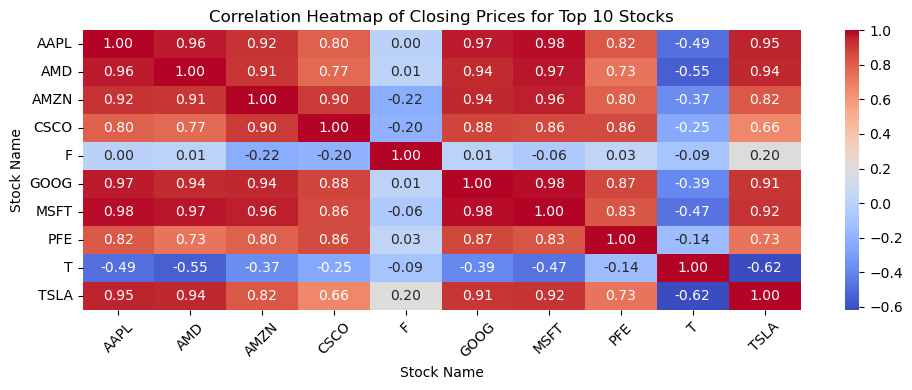

In [22]:
#Pivot the dataframe to have closing prices as columns
pivot_df = top_shares_df.pivot(index='Date', columns='Name', values='Close')

# Calculate correlation matrix
correlation_matrix = pivot_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Closing Prices for Top 10 Stocks')
plt.xlabel('Stock Name')
plt.ylabel('Stock Name')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### The above chart shows that the closing prices of Tesla and Microsoft have a very high correlation of 92%

## Daily Return Vs Risk analysis: 

In [23]:
# Calculate daily returns for each stock
top_shares_df['Daily Return'] = top_shares_df.groupby('Name')['Close'].pct_change()

# Calculate daily volatility (standard deviation of returns) for each stock
daily_volatility = top_shares_df.groupby('Name')['Daily Return'].std()

# Calculate average daily return for each stock
avg_daily_return = top_shares_df.groupby('Name')['Daily Return'].mean()

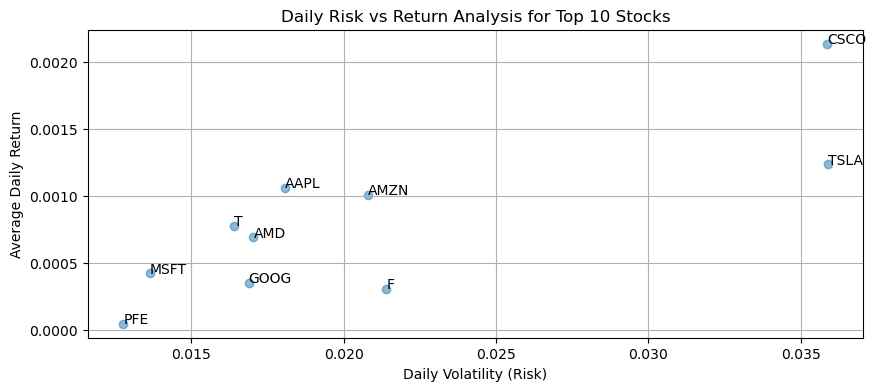

In [24]:
# Plot risk vs return
plt.figure(figsize=(10, 4))
plt.scatter(daily_volatility, avg_daily_return, alpha=0.5)
for i, name in enumerate(most_sold_stocks_df.index):
    plt.annotate(name, (daily_volatility[i], avg_daily_return[i]))
plt.title('Daily Risk vs Return Analysis for Top 10 Stocks')
plt.xlabel('Daily Volatility (Risk)')
plt.ylabel('Average Daily Return')
plt.grid(True)
plt.show()


### The chart above suggests that investing in Tesla carries higher risk but offers relatively good returns. On the other hand, Microsoft stock seems to be more stable with lower risk. Although its returns are lower compared to Tesla, they are better than those of other stocks like Google.

## Bar plot of Percentage change in Closing prices of each stock

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


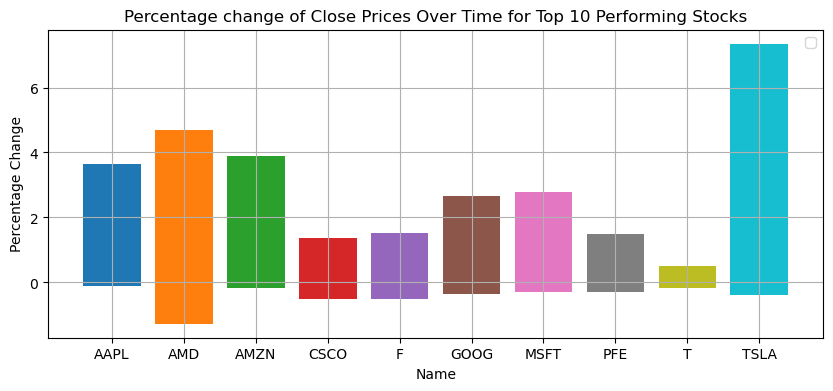

In [31]:
# Group by Name and calculate the total percentage change in Adjusted Close price
top_shares_df['Percentage Change'] = top_shares_df.groupby('Name')['Close'].pct_change().fillna(0)
top_shares_df['Total Percentage Change'] = top_shares_df.groupby('Name')['Percentage Change'].cumsum()

# Plot the adjusted close prices over time for the top 10 performing stocks
plt.figure(figsize=(10, 4))
for name, group in top_shares_df.groupby('Name'):
    plt.bar(group['Name'], group['Total Percentage Change'])
plt.title('Percentage change of Close Prices Over Time for Top 10 Performing Stocks')
plt.xlabel('Name')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()

### Tesla exhibits the highest percentage change, followed by AMD and Amazon. In contrast, Microsoft appears to demonstrate more stability with a relatively modest percentage change.

## Combined plots of volume of shares sold over the years with the closing prices

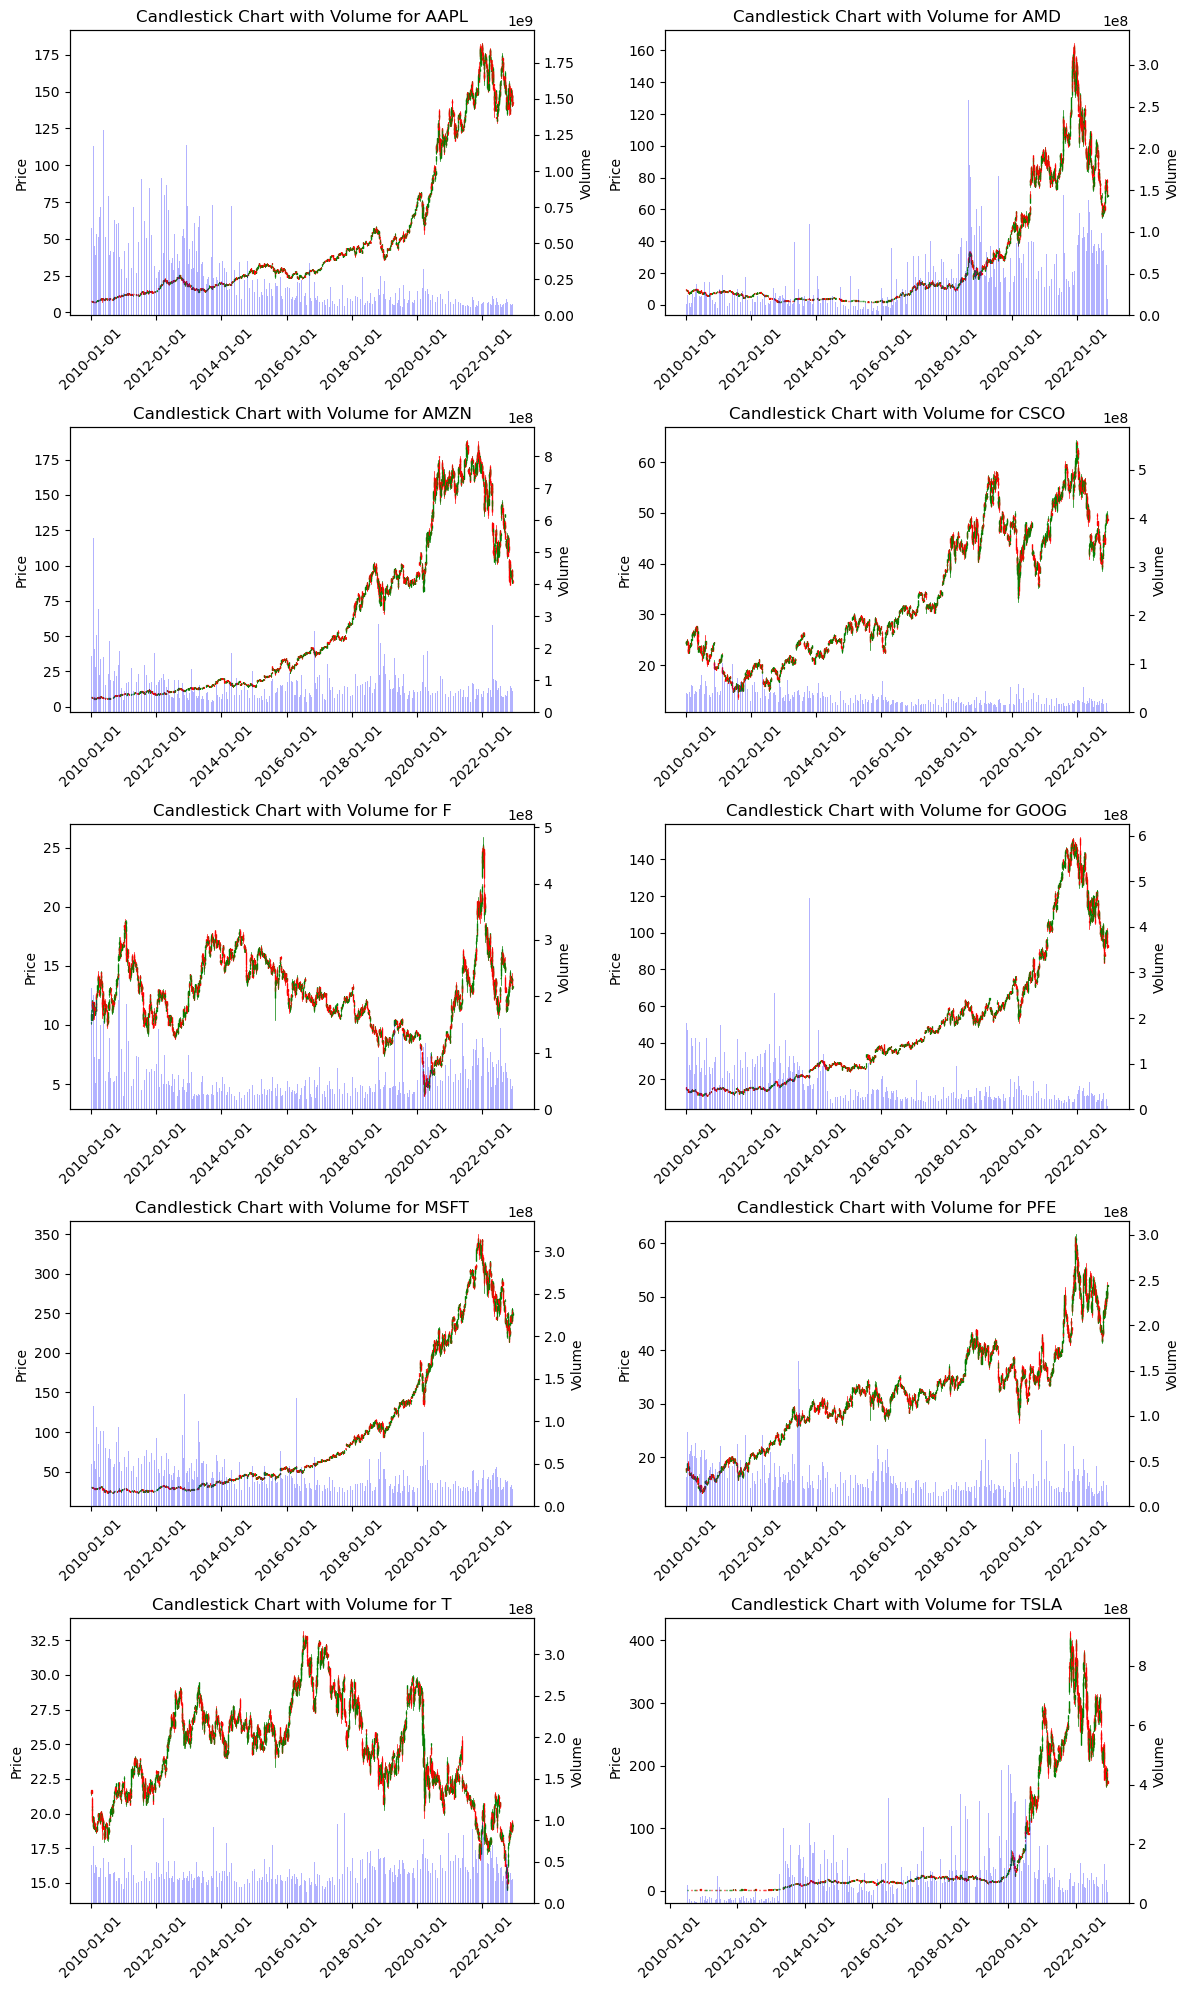

In [26]:
# Calculate 20-day and 50-day moving averages for each of the top 10 stocks
fig, axs = plt.subplots(5, 2, figsize=(12, 20))  # Creating subplots with 5 rows and 2 columns

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Grouping by Name
groups = top_shares_df.groupby('Name')

# Iterating through groups
for i, (name, group) in enumerate(groups):
    # Creating subplots with shared x-axis
    ax = axs[i]  # Selecting the current axis
    
    # Candlestick plot for close price
    ohlc = group[['Date', 'Open', 'High', 'Low', 'Close']]
    ohlc['Date'] = ohlc['Date'].apply(mdates.date2num)
    candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='g', colordown='r')
    ax.set_title(f'Candlestick Chart with Volume for {name}')
    ax.set_ylabel('Price')
    
    # Creating a twin Axes sharing the x-axis
    ax2 = ax.twinx()
    
    # Volume plot
    ax2.bar(group['Date'], group['Volume'], color='blue', label='Volume', alpha=0.3)
    ax2.set_ylabel('Volume')
    
    # Formatting
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
    # Customize the x-axis labels (optional)
    ax.tick_params(axis='x', rotation=45)
    
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()